In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf

# 1st Method - Support Vector Machine

In [4]:
!pip install numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from tensorflow.keras import layers, models
from skimage.feature import hog
import seaborn as sns

In [5]:
# Loading data
TrainImage = np.load('trnImage.npy')
TestImage=np.load('tstImage.npy')
TrainLabels=np.load('trnLabel.npy')
TestLabels=np.load('tstLabel.npy')

In [6]:
# Transposing the image data
TrainImage=TrainImage.transpose(3,0,1,2)
TestImage=TestImage.transpose(3,0,1,2)

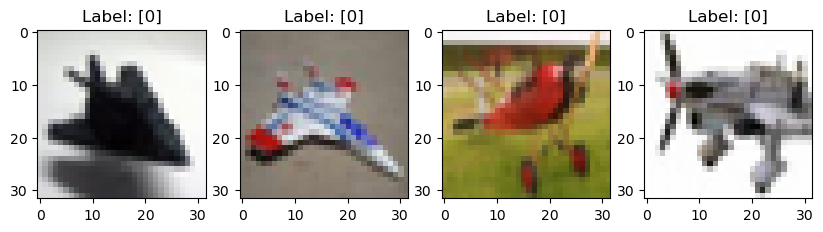

In [7]:
# Displaying images and its label
num_images_to_display = 4

# Create a subplot with a grid layout
fig, axes = plt.subplots(1, num_images_to_display, figsize=(10, 5))

for i in range(num_images_to_display):
    axes[i].imshow(TrainImage[i, :, :, :])
    axes[i].set_title(f"Label: {TrainLabels[i, :]}")

plt.show()


In [8]:
from sklearn.utils import shuffle
TrainImage,TrainLabels=shuffle(TrainImage,TrainLabels)

In [9]:
print(TrainImage.shape)
print(TestImage.shape)

(10000, 32, 32, 3)
(1000, 32, 32, 3)


In [10]:
#Reshaping the image
TrainImage_=np.reshape(TrainImage,newshape=(10000,3072))
TestImage_=np.reshape(TestImage,newshape=(1000,3072))

In [82]:
# Display reshaped data shape
print(TrainImage.shape)

(10000, 32, 32, 3)


In [12]:
from sklearn.svm import SVC

In [13]:
model=SVC(kernel='linear', random_state=28)

In [14]:
model.fit(TrainImage_,TrainLabels)

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=28)

In [15]:
model.score(TestImage_,TestLabels)

0.314

In [16]:
y_pred = model.predict(TestImage_)
y_pred.shape

(1000,)

In [17]:
TestLabels.shape

(1000, 1)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

<Axes: >

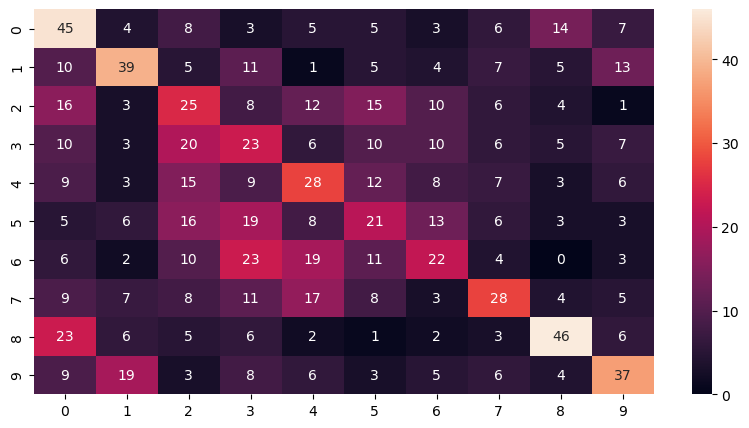

In [19]:
# Display confusion matrix using seaborn
plt.figure(figsize=[10, 5])
sns.heatmap(confusion_matrix(TestLabels, y_pred), annot=True)

In [20]:
accuracy_score(TestLabels,y_pred)

0.314

In [21]:
print(classification_report(TestLabels,y_pred))

              precision    recall  f1-score   support

           0       0.32      0.45      0.37       100
           1       0.42      0.39      0.41       100
           2       0.22      0.25      0.23       100
           3       0.19      0.23      0.21       100
           4       0.27      0.28      0.27       100
           5       0.23      0.21      0.22       100
           6       0.28      0.22      0.24       100
           7       0.35      0.28      0.31       100
           8       0.52      0.46      0.49       100
           9       0.42      0.37      0.39       100

    accuracy                           0.31      1000
   macro avg       0.32      0.31      0.32      1000
weighted avg       0.32      0.31      0.32      1000



# 2nd Method - CNN Model

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
# Loading data
TrainImage = np.load('trnImage.npy')
TestImage=np.load('tstImage.npy')
TrainLabels=np.load('trnLabel.npy')
TestLabels=np.load('tstLabel.npy')

In [14]:
# Transposing the image data
TrainImage = TrainImage.transpose(3, 0, 1, 2)
TestImage = TestImage.transpose(3, 0, 1, 2)

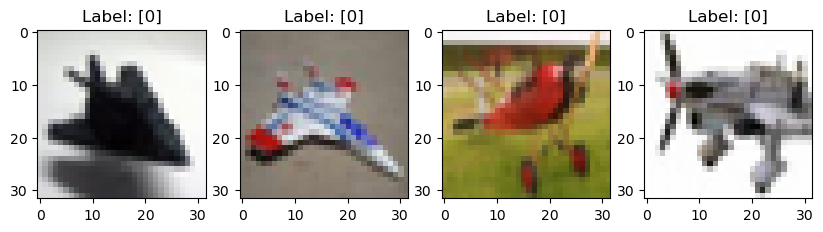

In [15]:
# Displaying an image and its label
num_images_to_display = 4

# Create a subplot with a grid layout
fig, axes = plt.subplots(1, num_images_to_display, figsize=(10, 5))

for i in range(num_images_to_display):
    axes[i].imshow(TrainImage[i, :, :, :])
    axes[i].set_title(f"Label: {TrainLabels[i, :]}")
plt.show()

In [16]:
# Shuffling the training data
TrainImage, TrainLabels = shuffle(TrainImage, TrainLabels)

In [17]:
# Displaying the data shapes
print(TrainImage.shape)
print(TestImage.shape)

(10000, 32, 32, 3)
(1000, 32, 32, 3)


In [18]:
# Normalizing image data to values between 0 and 1
TrainImage = TrainImage / 255.0
TestImage = TestImage / 255.0

In [19]:
# Building CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Training the model
model.fit(TrainImage, TrainLabels, epochs=100, batch_size=64, validation_split=0.2)


# Evaluating model performance on the test set
model_score = model.evaluate(TestImage, TestLabels)
print(f'Model Accuracy: {model_score[1]:.4f}')

Epoch 1/100
125/125 [==============================] - 8s 60ms/step - loss: 1.1553 - accuracy: 0.5935 - val_loss: 1.6667 - val_accuracy: 0.4530
Epoch 2/100
125/125 [==============================] - 8s 62ms/step - loss: 1.1476 - accuracy: 0.5961 - val_loss: 1.6427 - val_accuracy: 0.4480
Epoch 3/100
125/125 [==============================] - 8s 62ms/step - loss: 1.1447 - accuracy: 0.5991 - val_loss: 1.6623 - val_accuracy: 0.4380
Epoch 4/100
125/125 [==============================] - 7s 55ms/step - loss: 1.1551 - accuracy: 0.5909 - val_loss: 1.6465 - val_accuracy: 0.4515
Epoch 5/100
125/125 [==============================] - 7s 56ms/step - loss: 1.1358 - accuracy: 0.6036 - val_loss: 1.6558 - val_accuracy: 0.4405
Epoch 6/100
125/125 [==============================] - 8s 60ms/step - loss: 1.1331 - accuracy: 0.6031 - val_loss: 1.6350 - val_accuracy: 0.4425
Epoch 7/100
125/125 [==============================] - 7s 54ms/step - loss: 1.1317 - accuracy: 0.6003 - val_loss: 1.6481 - val_accuracy:

In [23]:
# Making predictions on the test set
y_pred = np.argmax(model.predict(TestImage), axis=1)

32/32 [==============================] - 1s 13ms/step


In [24]:
# Displaying the shape of predictions and true labels
print(f'y_pred shape: {y_pred.shape}')
print(f'TestLabels shape: {TestLabels.shape}')

y_pred shape: (1000,)
TestLabels shape: (1000, 1)


<Axes: >

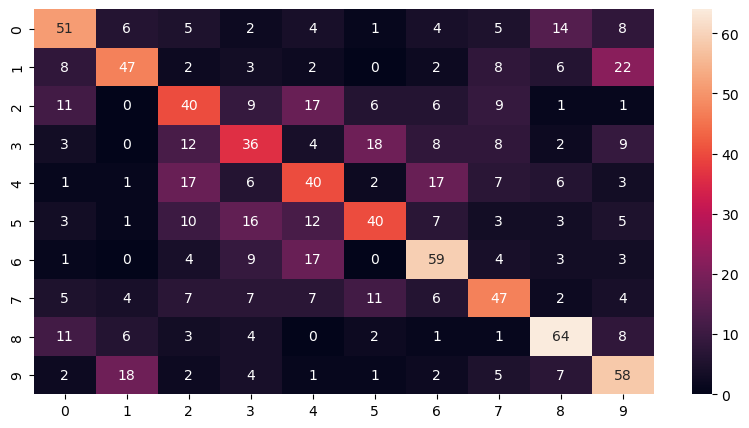

In [25]:
# Display confusion matrix using seaborn
plt.figure(figsize=[10, 5])
sns.heatmap(confusion_matrix(TestLabels, y_pred), annot=True)

In [26]:
# Calculate and display accuracy score
accuracy = accuracy_score(TestLabels, y_pred)
print(f'Accuracy Score: {accuracy:.4f}')

Accuracy Score: 0.4820


In [27]:
# Display classification report
print(classification_report(TestLabels, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.51      0.52       100
           1       0.57      0.47      0.51       100
           2       0.39      0.40      0.40       100
           3       0.38      0.36      0.37       100
           4       0.38      0.40      0.39       100
           5       0.49      0.40      0.44       100
           6       0.53      0.59      0.56       100
           7       0.48      0.47      0.48       100
           8       0.59      0.64      0.62       100
           9       0.48      0.58      0.52       100

    accuracy                           0.48      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.48      0.48      0.48      1000



 # 3rd Method - NN Model

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models

In [29]:
# Loading data
TrainImage = np.load('trnImage.npy')
TestImage=np.load('tstImage.npy')
TrainLabels=np.load('trnLabel.npy')
TestLabels=np.load('tstLabel.npy')

In [30]:
# Transposing the image data
TrainImage = TrainImage.transpose(3, 0, 1, 2)
TestImage = TestImage.transpose(3, 0, 1, 2)

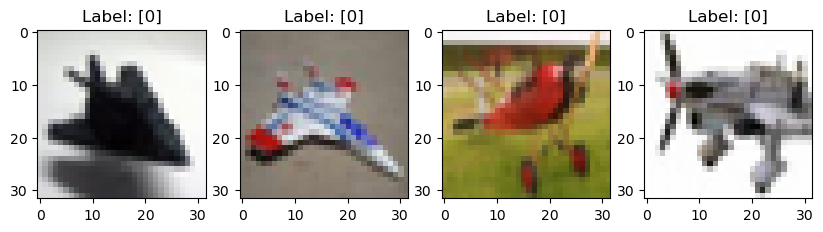

In [31]:
# Displaying an image and its label
num_images_to_display = 4

# Create a subplot with a grid layout
fig, axes = plt.subplots(1, num_images_to_display, figsize=(10, 5))

for i in range(num_images_to_display):
    axes[i].imshow(TrainImage[i, :, :, :])
    axes[i].set_title(f"Label: {TrainLabels[i, :]}")

plt.show()

In [32]:
# Shuffling the training data
TrainImage, TrainLabels = shuffle(TrainImage, TrainLabels)

In [33]:
# Reshaping and scaling data for neural network
TrainImage_reshaped = TrainImage.reshape((10000, 3072)).astype('float32') / 255.0
TestImage_reshaped = TestImage.reshape((1000, 3072)).astype('float32') / 255.0

In [34]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(TrainImage_reshaped, TrainLabels, test_size=0.2, random_state=42)

In [35]:
# Building a simple neural network model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(3072,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

In [36]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
125/125 [==============================] - 6s 45ms/step - loss: 2.2391 - accuracy: 0.1447 - val_loss: 2.1146 - val_accuracy: 0.1760
Epoch 2/100
125/125 [==============================] - 6s 46ms/step - loss: 2.0685 - accuracy: 0.2282 - val_loss: 2.0114 - val_accuracy: 0.2545
Epoch 3/100
125/125 [==============================] - 5s 36ms/step - loss: 1.9971 - accuracy: 0.2615 - val_loss: 1.9725 - val_accuracy: 0.2660
Epoch 4/100
125/125 [==============================] - 4s 36ms/step - loss: 1.9587 - accuracy: 0.2756 - val_loss: 1.9331 - val_accuracy: 0.2940
Epoch 5/100
125/125 [==============================] - 5s 44ms/step - loss: 1.9226 - accuracy: 0.2926 - val_loss: 1.9028 - val_accuracy: 0.3030
Epoch 6/100
125/125 [==============================] - 5s 36ms/step - loss: 1.9042 - accuracy: 0.3105 - val_loss: 1.8884 - val_accuracy: 0.3150
Epoch 7/100
125/125 [==============================] - 5s 38ms/step - loss: 1.8777 - accuracy: 0.3174 - val_loss: 1.8585 - val_accuracy:

In [38]:
# Evaluating the model on the test set
y_pred_prob = model.predict(TestImage_reshaped)
y_pred = np.argmax(y_pred_prob, axis=1)

32/32 [==============================] - 0s 7ms/step


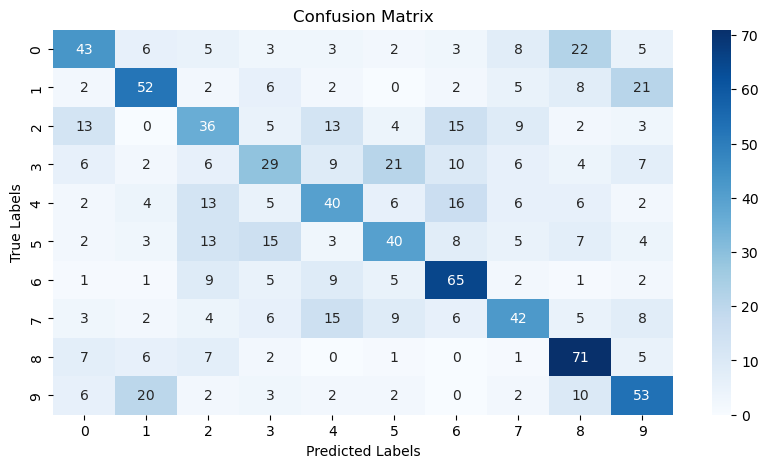

Model Accuracy: 0.471
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.43      0.46       100
           1       0.54      0.52      0.53       100
           2       0.37      0.36      0.37       100
           3       0.37      0.29      0.32       100
           4       0.42      0.40      0.41       100
           5       0.44      0.40      0.42       100
           6       0.52      0.65      0.58       100
           7       0.49      0.42      0.45       100
           8       0.52      0.71      0.60       100
           9       0.48      0.53      0.50       100

    accuracy                           0.47      1000
   macro avg       0.47      0.47      0.47      1000
weighted avg       0.47      0.47      0.47      1000



In [39]:
# Displaying the confusion matrix as a heatmap
plt.figure(figsize=[10, 5])
sns.heatmap(confusion_matrix(TestLabels, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Display additional metrics
accuracy = accuracy_score(TestLabels, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(TestLabels, y_pred))